In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load and parse the XML file
net_file = "/noah/project/infra-guidance/preprocess/sumo2av2/2024_sumo_testcase_setting_rosie/kcity2024.net.xml"

# Parse network file
net_tree = ET.parse(net_file)
net_root = net_tree.getroot()

# Extract edges and their shapes
edges = []
for edge in net_root.findall(".//edge"):
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape")
        if shape:
            # Parse shape and take only x, y coordinates
            points = [tuple(map(float, p.split(',')[:2])) for p in shape.split()]
            edges.append(points)

# Plot the network
plt.figure(figsize=(12, 12))
for edge_points in edges:
    x, y = zip(*edge_points)
    plt.plot(x, y, color="gray", linewidth=0.5)

# Add labels and title
plt.title("SUMO Network Visualization")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
# plt.xlim(450,1000)
# plt.ylim(2000,2200)
# plt.axis("equal")

plt.show()

In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load and parse the XML files
net_file = "2024_sumo_testcase_setting_rosie/kcity2024.net.xml"
route_file = "2024_sumo_testcase_setting_rosie/A1_tc.rou.xml"

# Define origin point (RSU coordinates)
origin_x, origin_y = 126.775283, 37.241634

# Parse network file
net_tree = ET.parse(net_file)
net_root = net_tree.getroot()

# Extract edges and their shapes
edge_shapes = {}
for edge in net_root.findall(".//edge"):
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape")
        if shape:
            # Convert absolute coordinates to relative to origin
            points = [
                (float(x) - origin_x, float(y) - origin_y)
                for x, y in (point.split(",")[:2] for point in shape.split())
            ]
            edge_shapes[edge.get("id")] = points

# Parse route file
route_tree = ET.parse(route_file)
route_root = route_tree.getroot()

# Extract routes
routes = {}
for route in route_root.findall(".//route"):
    route_id = route.get("id")
    edges = route.get("edges")
    if edges:
        routes[route_id] = edges.split()

# Plot the network
plt.figure(figsize=(12, 12))
for edge_points in edge_shapes.values():
    x, y = zip(*edge_points)
    plt.plot(x, y, color="gray", linewidth=0.5)

# Highlight routes
colors = ["red", "blue", "green", "orange", "purple"]  # Add more colors as needed
for i, (route_id, edge_ids) in enumerate(routes.items()):
    color = colors[i % len(colors)]  # Cycle through colors
    for edge_id in edge_ids:
        if edge_id in edge_shapes:
            edge_points = edge_shapes[edge_id]
            x, y = zip(*edge_points)
            plt.plot(x, y, color=color, linewidth=2, label=route_id if edge_id == edge_ids[0] else "")

# Add labels and title
plt.title("SUMO Routes Visualization (Relative to RSU Origin)")
plt.xlabel("X (Relative to Origin)")
plt.ylabel("Y (Relative to Origin)")
plt.axis("equal")
plt.legend()
plt.show()


In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load and parse the XML files
net_file = "2024_sumo_testcase_setting_rosie/kcity2024.net.xml"
route_file = "2024_sumo_testcase_setting_rosie/A1_tc.rou.xml"

origin_x, origin_y = 126.775283, 37.241634

# Parse network file
net_tree = ET.parse(net_file)
net_root = net_tree.getroot()

# Extract edges and their shapes along with lengths
edge_shapes = {}
edge_lengths = {}  # Dictionary to store lengths
for edge in net_root.findall(".//edge"):
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape")
        length = lane.get("length")
        if shape:
            # Convert absolute coordinates to relative to origin
            points = [
                (float(x) - origin_x, float(y) - origin_y)
                for x, y in (point.split(",")[:2] for point in shape.split())
            ]
            edge_id = edge.get("id")
            edge_shapes[edge_id] = edge_shapes.get(edge_id, []) + [points]
            if length:
                edge_lengths[edge_id] = float(length)  # Save the length as float

# Parse route file
route_tree = ET.parse(route_file)
route_root = route_tree.getroot()

# Extract routes
routes = {}
for route in route_root.findall(".//route"):
    route_id = route.get("id")
    edges = route.get("edges")
    if edges:
        routes[route_id] = edges.split()

# Plot the network
plt.figure(figsize=(12, 12))

# Highlight routes
import random
colors = ["red", "blue", "green", "orange", "purple"]  # Add more colors as needed
for i, (route_id, edge_ids) in enumerate(routes.items()):
    color = colors[i % len(colors)]  # Cycle through colors
    for edge_id in edge_ids:
        if edge_id in edge_shapes:
            for points in edge_shapes[edge_id]:
                x, y = zip(*points)
                plt.plot(x, y, color=random, linewidth=2)

                # Annotate the length at the midpoint of the lane
                if edge_id in edge_lengths:
                    midpoint_x = sum(x) / len(x)
                    midpoint_y = sum(y) / len(y)
                    plt.text(
                        midpoint_x, 
                        midpoint_y, 
                        f"{edge_lengths[edge_id]:.1f}m", 
                        fontsize=8, 
                        color="black"
                    )

# Add labels and title
plt.title("SUMO Routes Visualization with Lane Lengths")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.legend()
plt.show()


In [ ]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

# Load and parse the XML files
net_file = "2024_sumo_testcase_setting_rosie/kcity2024.net.xml"
route_file = "2024_sumo_testcase_setting_rosie/A1_tc.rou.xml"

origin_x, origin_y = 126.775283, 37.241634

# Parse network file
net_tree = ET.parse(net_file)
net_root = net_tree.getroot()

# Extract edges and their shapes
edge_shapes = {}
for edge in net_root.findall(".//edge"):
    for lane in edge.findall(".//lane"):
        shape = lane.get("shape")
        if shape:
            # Convert absolute coordinates to relative to origin
            points = [
                (float(x) - origin_x, float(y) - origin_y)
                for x, y in (point.split(",")[:2] for point in shape.split())
            ]
            edge_shapes[edge.get("id")] = points

# Parse route file
route_tree = ET.parse(route_file)
route_root = route_tree.getroot()

# Extract routes
routes = {}
for route in route_root.findall(".//route"):
    route_id = route.get("id")
    edges = route.get("edges")
    if edges:
        routes[route_id] = edges.split()

# Plot the network
plt.figure(figsize=(12, 12))

# Highlight routes
colors = ["red", "blue", "green", "orange", "purple"]  # Add more colors as needed
for i, (route_id, edge_ids) in enumerate(routes.items()):
    color = colors[i % len(colors)]  # Cycle through colors
    prev_point = None
    for edge_id in edge_ids:
        if edge_id in edge_shapes:
            edge_points = edge_shapes[edge_id]
            x, y = zip(*edge_points)
            plt.plot(x, y, color=color, linewidth=2, label=route_id if prev_point is None else "")

            # Connect to previous edge if exists
            if prev_point is not None:
                plt.plot(
                    [prev_point[0], edge_points[0][0]],
                    [prev_point[1], edge_points[0][1]],
                    color=color,
                    linewidth=1,
                    linestyle="dotted",
                )
            prev_point = edge_points[-1]

# Add labels and title
plt.title("SUMO Routes Visualization")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis("equal")
plt.legend()
# plt.xlim((400,445))
# plt.ylim((2010,2040))
plt.show()

# left, right line 그리는 방법
# drivable area -> 수동
# 


In [ ]:
import json
import matplotlib.pyplot as plt

# 맵 데이터 로드
def load_map(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# Lane segments 시각화
def plot_lane_segments(lane_segments, ax):
    for lane_id, lane_data in lane_segments.items():
        centerline = lane_data.get("centerline", [])
        if centerline:
            xs = [pt["x"] for pt in centerline]
            ys = [pt["y"] for pt in centerline]
            ax.plot(xs, ys, label=f"Lane {lane_id}", linewidth=1)

# Drivable areas 시각화
def plot_drivable_areas(drivable_areas, ax):
    for area_id, area_data in drivable_areas.items():
        boundary = area_data.get("area_boundary", [])
        if boundary:
            xs = [pt["x"] for pt in boundary] + [boundary[0]["x"]]  # 닫힌 다각형
            ys = [pt["y"] for pt in boundary] + [boundary[0]["y"]]
            ax.fill(xs, ys, alpha=0.3, label=f"Drivable Area {area_id}")

# 맵 시각화 함수
def plot_map(map_data):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='datalim')

    # Lane segments
    lane_segments = map_data.get("lane_segments", {})
    plot_lane_segments(lane_segments, ax)

    # Drivable areas
    # drivable_areas = map_data.get("drivable_areas", {})
    # plot_drivable_areas(drivable_areas, ax)

    # 그래프 스타일
    ax.set_title("Argoverse2 A1-Site")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="upper right", fontsize=8)
    plt.show()

# 실행
map_file = "/noah/dataset/infra-guidance/SUMO/sumo_origin/A1/A1_map.json"  # Argoverse2 맵 파일 경로
map_data = load_map(map_file)
plot_map(map_data)


In [ ]:
import geopandas as gpd
import json

# File paths
files = {
    "N3_RDM": "w1/N3_RDM.shp",
    "N2_LINK": "w1/N2_LINK.shp",
    "N1_NODE": "w1/N1_NODE.shp",
    "B3_SURFACEMARK": "w1/B3_SURFACEMARK.shp",
    "B2_SURFACELINEMARK": "w1/B2_SURFACELINEMARK.shp",
    "A2_LINK": "w1/A2_LINK.shp",
    "A1_NODE": "w1/A1_NODE.shp",
}

# Load shapefiles
dataframes = {key: gpd.read_file(path) for key, path in files.items()}

# Initialize the Argoverse map format
argoverse_map = {
    "drivable_areas": {},
    "lane_segments": {}
}

# Process Drivable Areas (Example: N3_RDM for polygon boundaries)
if "B2_SURFACELINEMARK" in dataframes:
    drivable_areas = dataframes["B2_SURFACELINEMARK"]
    for idx, row in drivable_areas.iterrows():
        boundary = row.geometry.exterior.coords if row.geometry.type == "Polygon" else []
        argoverse_map["drivable_areas"][f"drivable_area_{idx}"] = {
            "area_boundary": [{"x": pt[0], "y": pt[1], "z": 0.0} for pt in boundary],
            "id": idx
        }

# Process Lane Segments (Example: N2_LINK for centerlines)
if "A2_LINK" in dataframes:
    lane_segments = dataframes["A2_LINK"]
    for idx, row in lane_segments.iterrows():
        centerline = list(row.geometry.coords) if row.geometry.type == "LineString" else []
        argoverse_map["lane_segments"][f"lane_segment_{idx}"] = {
            "centerline": [{"x": pt[0], "y": pt[1], "z": 0.0} for pt in centerline],
            "id": idx,
            "is_intersection": False,
            "lane_type": "VEHICLE",
            "left_lane_boundary": [],  # Add logic if boundary info is available
            "right_lane_boundary": []  # Add logic if boundary info is available
        }

# Save the output to a JSON file
output_file = "w1/map.json"
with open(output_file, "w") as f:
    json.dump(argoverse_map, f, indent=4)

print(f"Argoverse map saved to {output_file}")


In [ ]:
import json
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np

# Load the JSON file
with open("w1/map.json", "r") as file:
    data = json.load(file)

# Extract drivable areas and lane segments
drivable_areas = data.get("drivable_areas", {})
lane_segments = data.get("lane_segments", {})

# Create a new plot
plt.figure(figsize=(12, 12))

# Generate a colormap for unique colors
num_areas = len(drivable_areas)
colors = get_cmap("tab20").colors  # You can choose other colormaps, e.g., "viridis", "plasma"
color_indices = np.linspace(0, 1, num_areas)

# Plot drivable areas
# for idx, (area_id, area_data) in enumerate(drivable_areas.items()):
#     boundary = area_data.get("area_boundary", [])
#     x_coords = [point["x"] for point in boundary]
#     y_coords = [point["y"] for point in boundary]
#     plt.fill(x_coords, y_coords, color=colors[idx % len(colors)], alpha=0.5, label=f"Drivable Area {area_id}")

# Plot lane segments
for segment_id, segment_data in lane_segments.items():
    centerline = segment_data.get("centerline", [])
    x_coords = [point["x"] for point in centerline]
    y_coords = [point["y"] for point in centerline]
    plt.plot(x_coords, y_coords, color='blue', linewidth=2, label="Lane Centerline" if segment_id == list(lane_segments.keys())[0] else "")

# Add plot details
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Argoverse V2 Map Visualization")
plt.xlim(302500, 302800)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
import geopandas as gpd

# Shapefile 로드
shapefile_path = "A1_NODE.shp"
gdf = gpd.read_file(shapefile_path)

# 데이터 확인
print(gdf.head())

from shapely.geometry import LineString

# 차선 중심선 추출 (예: "lane_centerline" 컬럼 기반)
lane_segments = gdf[gdf["feature_type"] == "lane_centerline"]

# GeoJSON으로 변환
# lane_segments_geojson = lane_segments.to_json()

# # 파일 저장
# with open("lane_segments.json", "w") as f:
#     f.write(lane_segments_geojson)


# HD MAP

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# .shp 파일 경로
node_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/A1_NODE.shp"
link_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/A2_LINK.shp"

# Shapefile 읽기
nodes = gpd.read_file(node_file_path)
links = gpd.read_file(link_file_path)

# 좌표 체계 확인 및 변환 (필요 시 WGS 84로 변환)
if nodes.crs.to_string() != "EPSG:4326":
    nodes = nodes.to_crs(epsg=4326)
if links.crs.to_string() != "EPSG:4326":
    links = links.to_crs(epsg=4326)

# 시각화
fig, ax = plt.subplots(figsize=(120, 100))

# 링크(선) 시각화
links.plot(ax=ax, color='blue', label='Links', linewidth=1)

# 노드(점) 시각화
nodes.plot(ax=ax, color='red', label='Nodes', markersize=10)

# 지도 스타일 추가
plt.title("Visualization of A1_NODE and A2_LINK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# .shp 파일 경로
linemark_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/B2_SURFACELINEMARK.shp"
mark_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/B3_SURFACEMARK.shp"

# Shapefile 읽기
linemarks = gpd.read_file(linemark_file_path)
marks = gpd.read_file(mark_file_path)

# 좌표 체계 확인 및 변환 (필요 시 WGS 84로 변환)
if linemarks.crs.to_string() != "EPSG:4326":
    linemarks = linemarks.to_crs(epsg=4326)
if marks.crs.to_string() != "EPSG:4326":
    marks = marks.to_crs(epsg=4326)

# 시각화
fig, ax = plt.subplots(figsize=(120, 100))

# 선형 마크(Linemarks) 시각화
linemarks.plot(ax=ax, color='blue', label='Surface Line Mark', linewidth=1)

# 표면 마크(Surface Marks) 시각화
marks.plot(ax=ax, color='green', label='Surface Mark', markersize=5)

# 지도 스타일 추가
plt.title("Visualization of B2_SURFACELINEMARK and B3_SURFACEMARK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# .shp 파일 경로
link_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/A2_LINK.shp"
linemark_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/B2_SURFACELINEMARK.shp"

# Shapefile 읽기
A2_links = gpd.read_file(link_file_path)
B2_linemarks = gpd.read_file(linemark_file_path)

# 좌표 체계 확인 및 변환 (필요 시 WGS 84로 변환)
if A2_links.crs.to_string() != "EPSG:4326":
    A2_links = A2_links.to_crs(epsg=4326)
if B2_linemarks.crs.to_string() != "EPSG:4326":
    B2_linemarks = B2_linemarks.to_crs(epsg=4326)

# 시각화
fig, ax = plt.subplots(figsize=(240, 200))

# A2_LINK 데이터 시각화 (도로 링크)
A2_links.plot(ax=ax, color='blue', label='Road A2_Links', linewidth=1)

# B2_SURFACELINEMARK 데이터 시각화 (선형 마크)
B2_linemarks.plot(ax=ax, color='red', label='Surface Line Marks', linewidth=0.5)

# 지도 스타일 추가
plt.title("Visualization of A2_LINK and B2_SURFACELINEMARK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()


In [41]:
A2_links.head()

,ID,AdminCode,RoadRank,RoadType,RoadNo,LinkType,MaxSpeed,LaneNo,R_LinkID,L_LinkID,...,TLCodeIn,TLCodeOut,N_LinkID,N_NodeID,N_LinkPN,Maker,UpdateDate,Version,Remark,geometry
0,A2245W001008,233,9,1,None,1,60,1,None,None,...,None,None,None,N1245W000248,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77389 37.24737 20.00000, 126..."
1,A2245W001009,233,9,1,None,6,60,1,None,None,...,None,None,N2245W000278,None,1,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77358 37.24760 20.00000, 126..."
2,A2245W001010,233,9,1,None,6,60,1,None,None,...,None,None,N2245W000280,None,1,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77390 37.24740 20.00000, 126..."
3,A2245W001011,233,9,1,None,1,60,1,None,None,...,None,None,None,N1245W000089,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77366 37.24601 20.00000, 126..."
4,A2245W001012,233,9,1,None,1,60,1,None,None,...,None,None,None,N1245W000278,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77264 37.24614 20.00000, 126..."


In [42]:
B2_linemarks.head()
# B2_linemarks.iloc[-20:].ID

,ID,AdminCode,Type,Kind,R_LinkID,L_LinkID,Maker,UpdateDate,Version,Remark,geometry
0,B2245W001001,233,212,503,A2245W001112,A2245W001113,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77410 37.24381 20.00000, 126..."
1,B2245W001002,233,212,503,A2245W001117,A2245W001114,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77369 37.24364 20.00000, 126..."
2,B2245W001003,233,111,501,A2245W001114,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77372 37.24364 20.00000, 126..."
3,B2245W001004,233,111,501,A2245W001057,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77375 37.24287 20.00000, 126..."
4,B2245W001005,233,212,525,A2245W001283,None,웨이즈원,20240531,2019,None,"LINESTRING Z (126.77462 37.24277 20.00000, 126..."


/tmp/ipykernel_328898/3326586308.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  A2_links.geometry.centroid.within(origin.buffer(margin))
/tmp/ipykernel_328898/3326586308.py:33: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  B2_linemarks.geometry.centroid.within(origin.buffer(margin))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


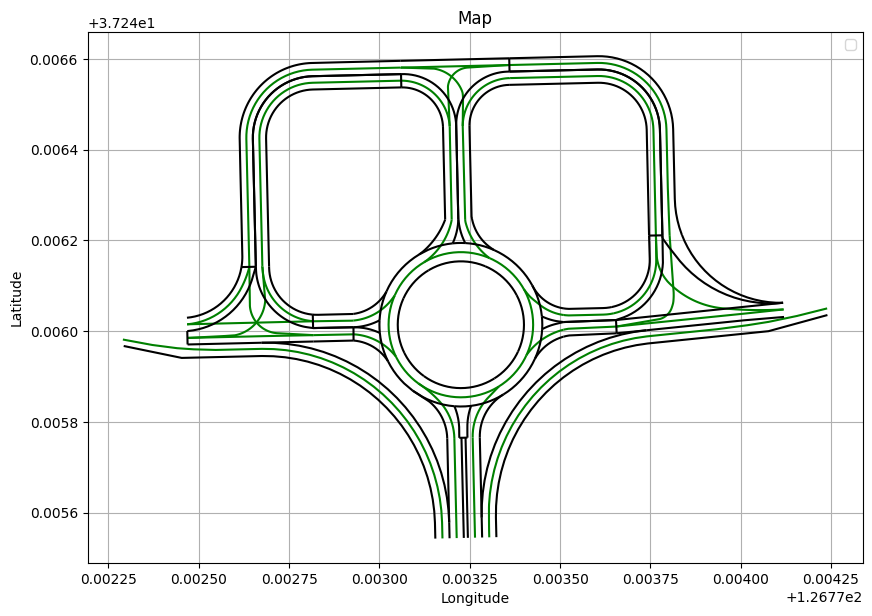

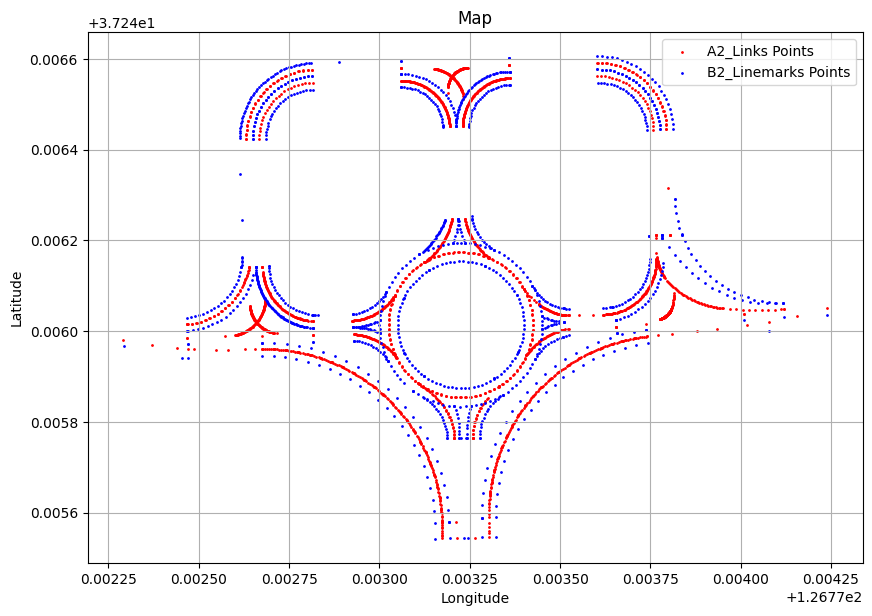

In [43]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, MultiPoint

# .shp 파일 경로
link_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/A2_LINK.shp"
linemark_file_path = "/noah/project/infra-guidance/preprocess/sumo2av2/w1/B2_SURFACELINEMARK.shp"

# Shapefile 읽기
A2_links = gpd.read_file(link_file_path)
B2_linemarks = gpd.read_file(linemark_file_path)

# 좌표 체계 확인 및 변환 (필요 시 WGS 84로 변환)
if A2_links.crs.to_string() != "EPSG:4326":
    A2_links = A2_links.to_crs(epsg=4326)
if B2_linemarks.crs.to_string() != "EPSG:4326":
    B2_linemarks = B2_linemarks.to_crs(epsg=4326)

# 원점과 마진 정의
# A1: 126.773182, 37.246011
# B1: 126.775283, 37.241634
# C1/C3: 126.774607, 37.242924
# D3/D4: 126.773603, 37.239634
origin = Point(126.773182, 37.246011)
margin = 0.0008  # 100미터 변환 (약 0.09도)

# 데이터 필터링 (라인 중심점 기준)
A2_links_filtered = A2_links[
    A2_links.geometry.centroid.within(origin.buffer(margin))
]
B2_linemarks_filtered = B2_linemarks[
    B2_linemarks.geometry.centroid.within(origin.buffer(margin))
]

# 또는 라인의 모든 좌표를 점으로 변환
A2_links_all_points = A2_links_filtered.geometry.apply(
    lambda line: MultiPoint(line.coords) if line else None
).explode(index_parts=False)
B2_linemarks_all_points = B2_linemarks_filtered.geometry.apply(
    lambda line: MultiPoint(line.coords) if line else None
).explode(index_parts=False)

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 라인의 모든 좌표 시각화
A2_links_filtered.plot(ax=ax, color='green')
B2_linemarks_filtered.plot(ax=ax, color='black')

# A2_links_all_points.plot(ax=ax, color='red', label='A2_Links Points', markersize=1)
# B2_linemarks_all_points.plot(ax=ax, color='blue', label='B2_Linemarks Points', markersize=1)


# 지도 스타일 추가
plt.title("Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()

# 시각화
fig, ax = plt.subplots(figsize=(10, 8))

# 라인의 모든 좌표 시각화
A2_links_all_points.plot(ax=ax, color='red', label='A2_Links Points', markersize=1)
B2_linemarks_all_points.plot(ax=ax, color='blue', label='B2_Linemarks Points', markersize=1)

# 지도 스타일 추가
plt.title("Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)

plt.show()

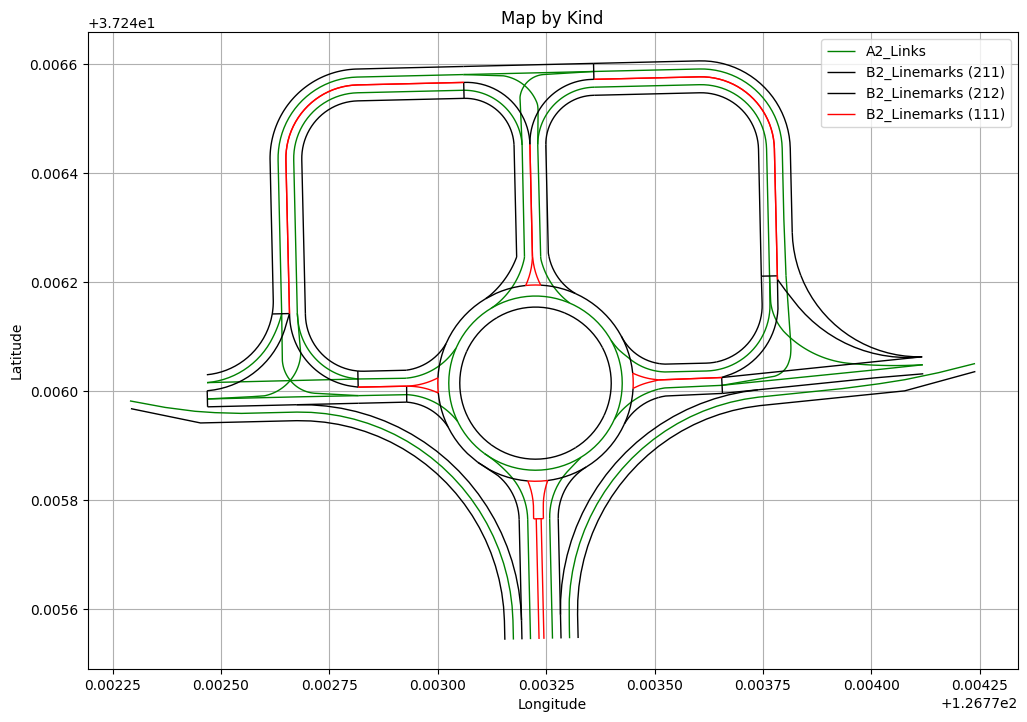

In [59]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# 고유한 kind 값 추출
unique_kinds = B2_linemarks_filtered["Type"].unique()

# 고유 kind 값에 대해 색상 매핑 생성
color_map = {
    '211' : 'black',
    '212' : 'black',
    '111' : 'red'
}

# 시각화
fig, ax = plt.subplots(figsize=(12, 10))

# A2_links_filtered 시각화
A2_links_filtered.plot(ax=ax, color='green', label='A2_Links', linewidth=1)

# B2_linemarks_filtered kind별 시각화
for kind in unique_kinds:
    subset = B2_linemarks_filtered[B2_linemarks_filtered["Type"] == kind]
    subset.plot(ax=ax, color=color_map[kind], label=f'B2_Linemarks ({kind})', linewidth=1)

# 지도 스타일 추가
plt.title("Map by Kind")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()
